
<h1 align="center" style="color: #cd7f32;"> Solving NP-Complete Problems using Quantum Programming </h1>


<h1> cnx </h1>

In [1]:
def cnx(n,mycircuit,qreg):
    a = 0
    for i in range(1,int(n/2)):
        
        mycircuit.ccx(qreg[2*i],qreg[(2*i)-1],qreg[n+a])
        a+=1
    mycircuit.ccx(qreg[n+a-1],qreg[n+a-2],qreg[0])
    a=0;
    for i in range(1,int(n/2)):
        
        mycircuit.ccx(qreg[2*i], qreg[(2*i)-1], qreg[n+a])
        a+=1

<h1> 3SAT Function </h1>

In [2]:
![]1.jpeg

'[]1.jpeg' is not recognized as an internal or external command,
operable program or batch file.


![](0.png)
![](1.png)

<h1> TRIPLE OR GATE </h1>

In [3]:
def tripleOrGate(mycircuit,qreg,i,j,k,list):
    mycircuit.x(qreg[i])
    mycircuit.x(qreg[j])
    mycircuit.x(qreg[k])
    mycircuit.mct([qreg[i],qreg[j],qreg[k]],qreg[])
    mycircuit.x(qreg[0])

SyntaxError: invalid syntax (<ipython-input-3-ab7c371a4217>, line 5)

<h1> OR GATE </h1>
Less gates and seems more efficient.

In [5]:
def orGate (mycircuit, qreg):
    mycircuit.x(qreg[0])
    mycircuit.x(qreg[1])
    
    mycircuit.ccx(qreg[0],qreg[1],qreg[2])
    mycircuit.x(qreg[2])

<h1> ALTERNATIVE OR GATE ((a & a)' & (b & b)')' = a || b </h1>
This one has too many gates therefore it's more complex.

In [6]:
def altOrGate (mycircuit, qreg):
    mycircuit.ccx(qreg[0], qreg[0], qreg[2]) #(qreg[0] & qreg[0] --> qreg[2])
    mycircuit.ccx(qreg[1], qreg[1], qreg[3]) #(qreg[2] & qreg[1] --> qreg[3])
    mycircuit.x(qreg[2]) # (qreg[2])'
    mycircuit.x(qreg[3]) # (qreg[3])'
    mycircuit.ccx(qreg[2], qreg[3], qreg[4]) # (qreg[2] & qreg[3] --> qreg[4])
    mycircuit.x(qreg[4]) # (qreg[4])'

<h1> AND GATE </h1>

In [7]:
def andGate (mycircuit, qreg):
    mycircuit.ccx(qreg[0], qreg[1], qreg[2])

<h1> Inversion </h1>

In [1]:
#parametreli hale getirilecek
def inversion(circuit,quantum_reg,n):
    
    
    #step 1
    for i in range(n):
        circuit.h(quantum_reg[i])
    
    #step 2
 
    for i in range(n):
        circuit.x(quantum_reg[i])

    #step 3
    #[0...n-1] control list, extra qubit list
    controlQubits=[]
    ancillaQubits=[]
    
    for i in range(n):
        controlQubits.append(qreg[i])
    
    
    for i in range(n+1,2*n):
        ancillaQubits.append(qreg[i])
    circuit.mct(controlQubits, qreg[n], ancillaQubits)
        

    #step 4

    for i in range(n):
        circuit.x(quantum_reg[i])
    #step 5
   
    for i in range(n):
        circuit.h(quantum_reg[i])

    
    circuit.x(quantum_reg[n])

<h1> RANDOM CNF GENERATOR </h1>

<b> Issues: </b>
1) Can we create a quantum register without initializing it? Because we need the method to initiliaze it over and over.
    - We need a different circuit for every variable number.
2) How can write the NOT of a qubit next to it?
    - First check if the clause has a negative value. NOT the negatives and OR all of it.
3) A qubit and its not cannot be in the same clause, how?

<b> #TODO </b>
1) Try writing it without qubits.
2) <b> #of Qubits Needed --> </b> n + k + 1 for ORs (same one for all) + for mct (+k ?)
3) Triple OR Arguments: (q1, q2, q3, target, extra)
4) Write it to a file.
5) <b> Helpful --> </b> https://www.cs.ubc.ca/~hoos/SATLIB/benchm.html  

In [2]:
#m --> number of clauses
#k --> number of literals

import random, re
cnfControl = [[]]

def create(x,y,z):
    r = (lambda : random.randint(0,1))
    a = [(x,r()),(y,r()),(z,r())]
    b = [a[1],a[2],a[0]]
    c = [a[2],a[0],a[1]]
    d = [a[1],a[0],a[2]]
    e = [a[2],a[1],a[0]]
    f = [a[0],a[2],a[1]]
    
    cnfControl.append([b])
    cnfControl.append([c])
    cnfControl.append([d])
    cnfControl.append([e])
    cnfControl.append([f])
    return [a]

def unique(l,k):
        t = random.randint(1,k)
        while(t in l):
            t = random.randint(1,k)
        return t
    
def createXYZ(k):
    x = unique([],k)
    y = unique([x],k)
    z = unique([x, y],k)  
    return create(x,y,z)
    
def tcnfgen(m,k,horn=1):
    cnf = []
    cnfControl[:] = [[]]
    if horn:
        cnf.append([(x,1), (y,0),(z,0)])
    else:
        p=0
        while(p < m):
            z=createXYZ(k)
            if (z not in cnfControl):
                cnf.append(z)
                cnfControl.append(z)
                p=p+1
                    
            
    listAsStr = ("").join(map(str, cnf))
    nonDecStrippedList = re.findall(r'[\d.]+', listAsStr)
    nonDecListAsStr = ("").join(map(str, nonDecStrippedList))
    return nonDecListAsStr

In [9]:
import time
f=open("tcnfgeninputs.txt", "r")
outNumber=1
#for line in f:
while True:
    timestr = time.strftime("%Y%m%d-%H%M%S")
    line = f.readline()
    if (not(line)):
        break
    outString= ("out"+str(outNumber)+"-"+timestr+".txt")
    file = open(outString, "w")
    nonDecStrippedList = re.findall(r'[\d.]+', line) #makes list
    #file = open("out1.txt", "w")
    a=int(nonDecStrippedList[0])
    b=int(nonDecStrippedList[1])
    m=int(nonDecStrippedList[2])
    file.write(str(a)+"\n"+str(b)+"\n")
    for i in range(m):
        file.write(tcnfgen(a,b,0))
        file.write("\n")
    #file.write("\n")
    outNumber+=1
    time.sleep(1)
file.close()

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, BasicAer, IBMQ, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua.circuits.gates import mct
from qiskit.aqua.circuits.gates import mct
import time

start_time = time.time()
ff=open("out1-20191230-084347.txt", "r")
k=int(ff.readline())
n=int(ff.readline())

maxN= max(n+2*k+2,2*n+1)
r=0
while(True):
    nextLine= (ff.readline())
    if (not(nextLine)):
        break
    qreg = QuantumRegister(maxN)  # quantum register with 5 qubits
    creg = ClassicalRegister(maxN)  # classical register with 5 bits
    mycircuit = QuantumCircuit(
        qreg, creg)  # quantum circuit with quantum and classical registers

    for i in range(n):
        mycircuit.h(qreg[i])

        #set ancilla
    mycircuit.x(qreg[n])
    mycircuit.h(qreg[n])

    iterations = 4

    #Grover's iterations.
    for i in range(iterations):
        #query
        blackBox(mycircuit, qreg,n,k,nextLine)
        mycircuit.barrier()
        #inversion
        inversion(mycircuit, qreg,n)
        mycircuit.barrier()

    #set ancilla back
    
    mycircuit.h(qreg[n])
    
    mycircuit.x(qreg[n])
    mycircuit.measure(qreg, creg)

    job = execute(mycircuit, Aer.get_backend('qasm_simulator'), shots=50000)
    counts = job.result().get_counts(mycircuit)

    # print the reverse of the outcome
    for outcome in counts:
        reverse_outcome = ''
        for i in outcome:
            reverse_outcome = i + reverse_outcome
        print(reverse_outcome, "is observed", counts[outcome], "times")
    print("\n")
    mycircuit.draw(output='mpl')
    
print(("--- %s seconds ---" + str(time.time() - start_time)))
    

001000000 is observed 995 times
101000000 is observed 1018 times
011000000 is observed 1082 times
100000000 is observed 1012 times
010000000 is observed 989 times
000000000 is observed 1027 times
110000000 is observed 1032 times
111000000 is observed 1037 times


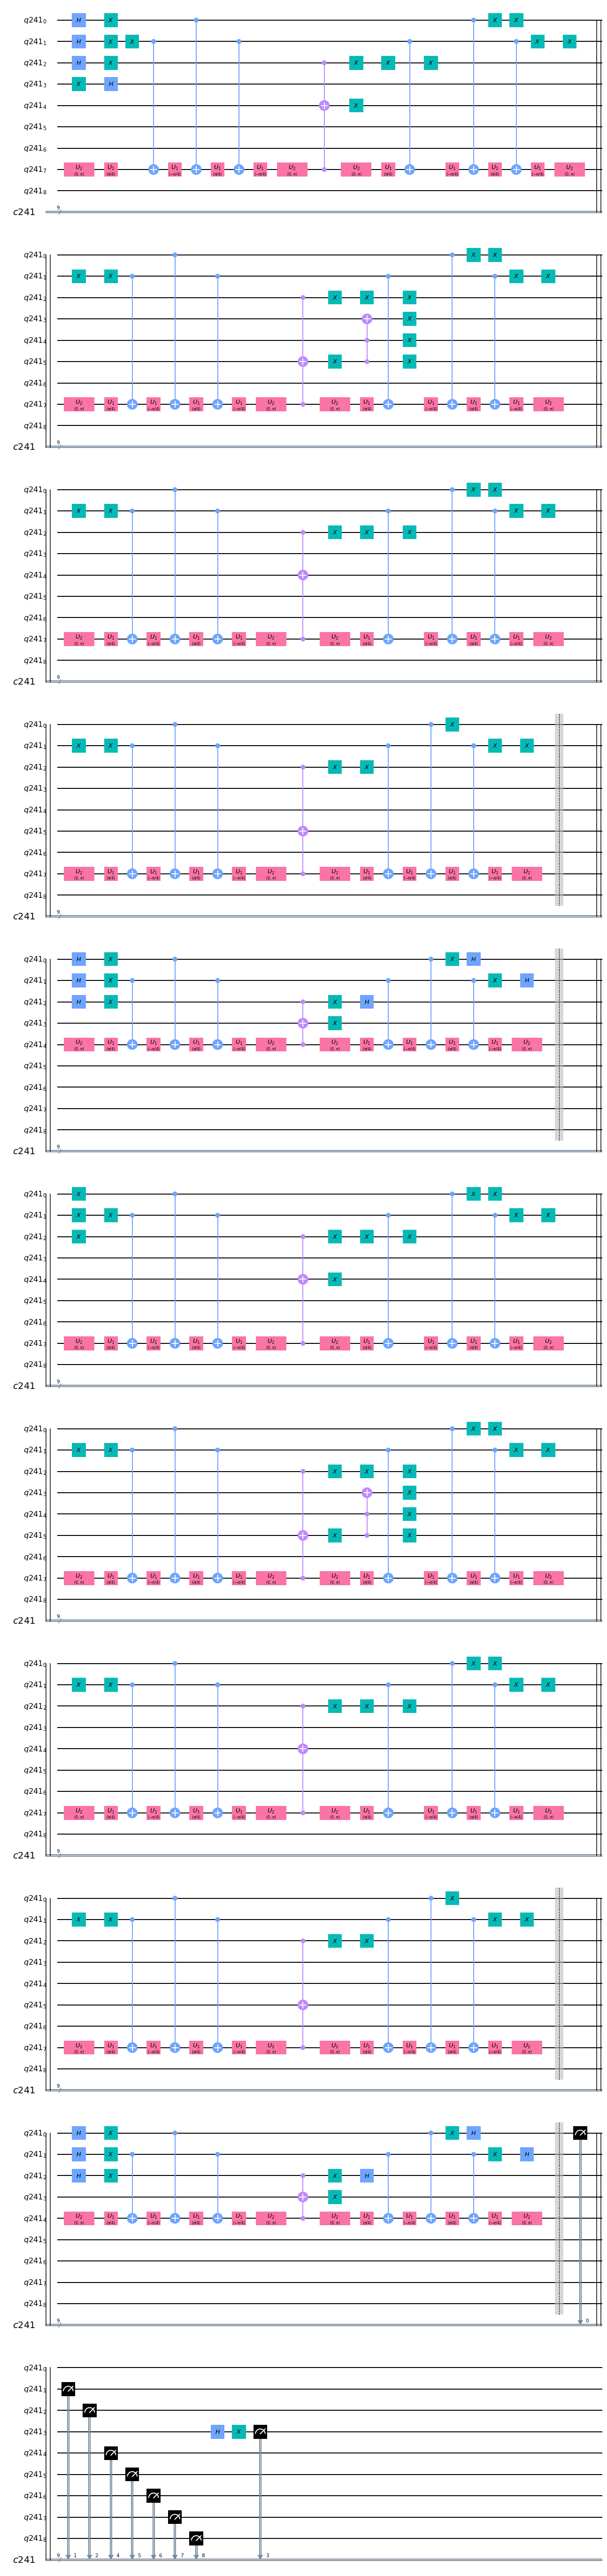

In [94]:
    counts = job.result().get_counts(mycircuit)

    # print the reverse of the outcome
    for outcome in counts:
        reverse_outcome = ''
        for i in outcome:
            reverse_outcome = i + reverse_outcome
        print(reverse_outcome, "is observed", counts[outcome], "times")

    mycircuit.draw(output='mpl')

In [4]:
def blackBox (mycircuit,qreg,n, k, nextLine):
    ancillaList=[]
    clauselength=6 #6 sabit olmamalı
    for i in range(n+1, n+k+1):
        ancillaList.append(qreg[i])
        
    ############ her clause için
    for j in range(k):
        
        ########### not ###########3
        initElement = clauselength*j
        for i in range(3):#3 değil n
            if (int(nextLine[initElement+2*i+1])==0):
                mycircuit.x(qreg[int(nextLine[initElement+2*i])-1])
               # print(int(nextLine[initElement+2*i])-1)
            
        
        
        ##################### or ########################
        orList=[]
        for i in range(3): #0 1 2 olmamalı
            mycircuit.x(qreg[i])
            orList.append(qreg[i])
       
        mycircuit.mct(orList,ancillaList[j],[qreg[n+2*k],qreg[n+2*k+1]])
        mycircuit.x(ancillaList[j])

        for i in range(3): #0 1 2 olmamalı
            mycircuit.x(qreg[i])
            
        ################  not geri al #################
        for i in range(3):
            if (int(nextLine[initElement+2*i+1])==0):
                mycircuit.x(qreg[int(nextLine[initElement+2*i])-1])
                
                
    ############# or ları notla ################
    ancillaception=[]

    for i in range(n+k+1, n+2*k):
        ancillaception.append(qreg[i])
    mycircuit.mct(ancillaList,qreg[n],ancillaception)
    mycircuit.x(qreg[n])
    
    
    ############# ancila listi geri al
    
     ############ her clause için
    for j in range(k):
        
        ########### not ###########3
        initElement = clauselength*j
        for i in range(3):#3 değil n
            if (int(nextLine[initElement+2*i+1])==0):
                mycircuit.x(qreg[int(nextLine[initElement+2*i])-1])
               # print(int(nextLine[initElement+2*i])-1)
       
        
        ##################### or ########################
        orList=[]
        for i in range(3): #0 1 2 olmamalı
            mycircuit.x(qreg[i])
            orList.append(qreg[i])
       
        mycircuit.x(ancillaList[j])
        mycircuit.mct(orList,ancillaList[j],[qreg[n+2*k],qreg[n+2*k+1]])
       

        for i in range(3): #0 1 2 olmamalı
            mycircuit.x(qreg[i])
            
        ################  not geri al #################
        for i in range(3):
            if (int(nextLine[initElement+2*i+1])==0):
                mycircuit.x(qreg[int(nextLine[initElement+2*i])-1])
    
    
    